In [2]:
import csv
import pybaseball
pybaseball.cache.enable()
from pybaseball import statcast
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [44]:
statcast_2022 = statcast(start_dt="2022-04-07", end_dt="2022-11-05")[1:]
statcast_2022.to_csv("./pitch_data.csv", index=False)

This is a large query, it may take a moment to complete


100%|██████████| 213/213 [00:18<00:00, 11.43it/s]


In [3]:
pitch_data = pd.read_csv("pitch_data.csv")

In [4]:
hit_data = pitch_data.loc[(pitch_data['description'] == 'hit_into_play') & (pitch_data['game_type'] == 'R')]

In [28]:
ball_info = hit_data.filter(['events', 'launch_speed', 'launch_angle'])

In [29]:
ball_info = ball_info.dropna()

In [30]:
ball_info = ball_info.loc[ball_info['events'] != 'catcher_interf']


In [31]:
ball_info['is_home_run'] = ball_info.events == 'home_run'
ball_info = ball_info.drop(['events'], axis=1)

In [32]:
data = ball_info.drop(['is_home_run'], axis=1).to_numpy()
labels = ball_info.is_home_run.to_numpy()

In [33]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.20, random_state=7)

In [35]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
neigh.score(X_test, y_test)

0.9739218465276371

In [37]:
val_pred = neigh.predict(X_test)

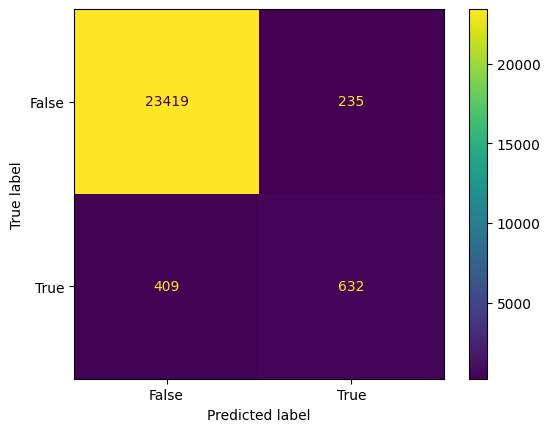

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, val_pred)
plt.show()

In [42]:
svc_model = SVC(C=100).fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, svc_predictions)
plt.show()